(chap-geographic-maps)=
# Geographic maps

```{contents} Sections
:local:
:depth: 1
```

## Projections


```{div} full-width
Let us import the main python libraries
```

In [1]:
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
import cartopy

In [2]:
%matplotlib inline
np.set_printoptions(precision=1)
import warnings
warnings.filterwarnings("ignore")

```{div} full-width
Using the submodule `cartopy.crs` we can setup the geodetic projection where points are indetified by longitude and latitude
```

In [3]:
geodetic = cartopy.crs.Geodetic()

```{div} full-width
or define a different projection as, for instant, the azimuthal equidistant one with respect to a specified geographic point
```

In [4]:
lon0 = 13
lat0 = 42.5
projection = cartopy.crs.AzimuthalEquidistant(central_longitude=lon0, central_latitude=lat0)

```{div} full-width
Then, we can create a matplotlib subplot with the optional argument `subplot_kw=dict(projection=projection)` to make a geographic map, set the geographic extent in geodetic coordinates, draw the gridlines, the coastlines and the state border as well
```

In [5]:
def make_geomap(projection, extent):

    fig,ax = plt.subplots(tight_layout=True, figsize=(8,8), subplot_kw=dict(projection=projection, transform=projection))
    ax.set_extent(extent)

    ax.coastlines()
    ax.add_feature(cartopy.feature.BORDERS,color="gray");

    gl = ax.gridlines(draw_labels=True)
    gl.top_labels, gl.left_labels = False, False
    
    return fig

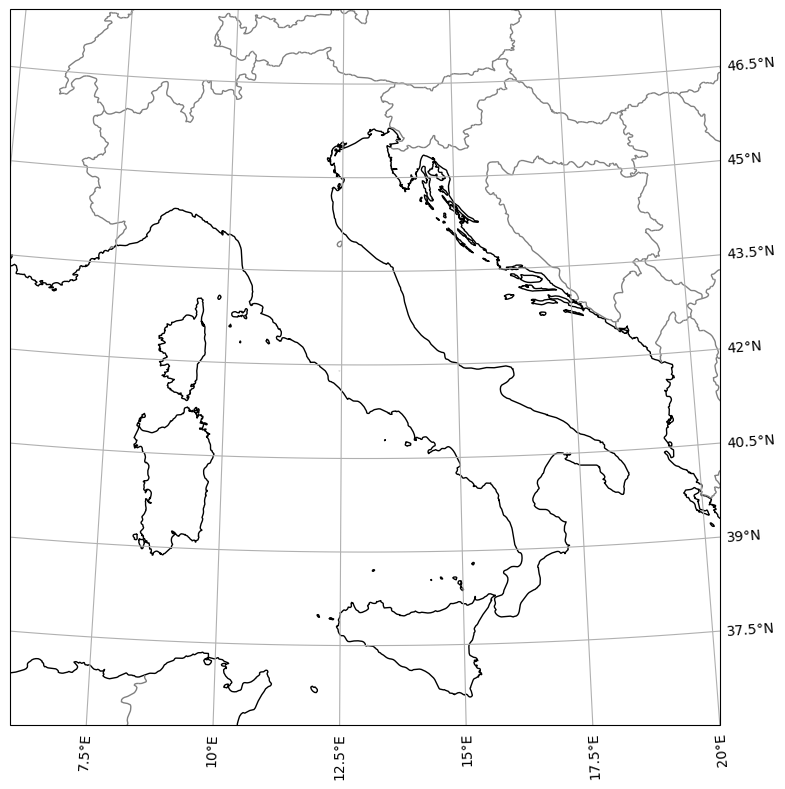

In [6]:
extent = [6,20,36,47.5]
fig = make_geomap(projection, extent)

## Coordinate transformation

```{div} full-width
Let us now define a numpy array collecting the longitudes, latitudes and elevations (in meters) of four geographic points
```

In [7]:
lles =np.array([[lon0,lat0,0],[15,43.5,-200],[17.5,39,1600],[10,45,2000]]).T
print("Geodetic:\n")
print("longitude:",lles[0],"[deg]")
print("latitude: ",lles[1],"[deg]")
print("elevation:",lles[2]/1e3,"[km]")

Geodetic:

longitude: [13.  15.  17.5 10. ] [deg]
latitude:  [42.5 43.5 39.  45. ] [deg]
elevation: [ 0.  -0.2  1.6  2. ] [km]


```{div} full-width
and make use of the method `transfom_points` to get the Cartesian coordinates in the Azimuthal equidistant projection
```

In [8]:
xyzs = projection.transform_points(geodetic, *lles).T
print("Azimuthal equidistant:\n")
print("x:",xyzs[0]/1e3,"[km]")
print("y:",xyzs[1]/1e3,"[km]")
print("z:",xyzs[2]/1e3,"[km]")

Azimuthal equidistant:

x: [   0.   161.7  389.9 -236.6] [km]
y: [   0.   113.  -378.6  282. ] [km]
z: [ 0.  -0.2  1.6  2. ] [km]


```{div} full-width
Then, we remake the geographic maps and plot the points 
```

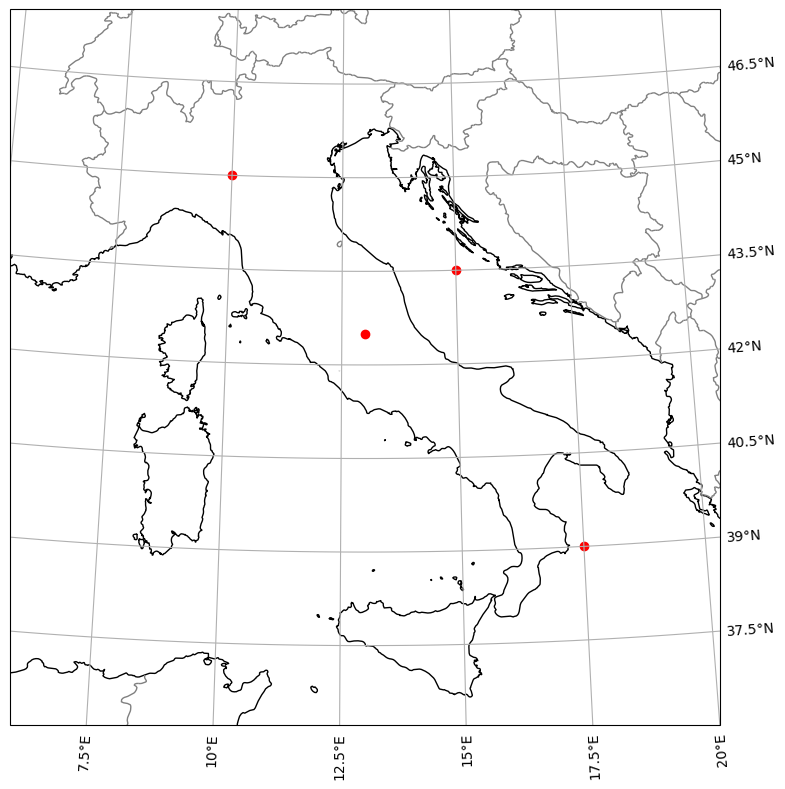

In [9]:
fig = make_geomap(projection, extent)
ax = fig.gca()
ax.scatter(*xyzs[:2], color="red");

```{div} full-width
The same results can be obtained providing the Geodetic coordinates `lles` and using the optional argument `transform=cartopy.crs.PlateCarree()`
```

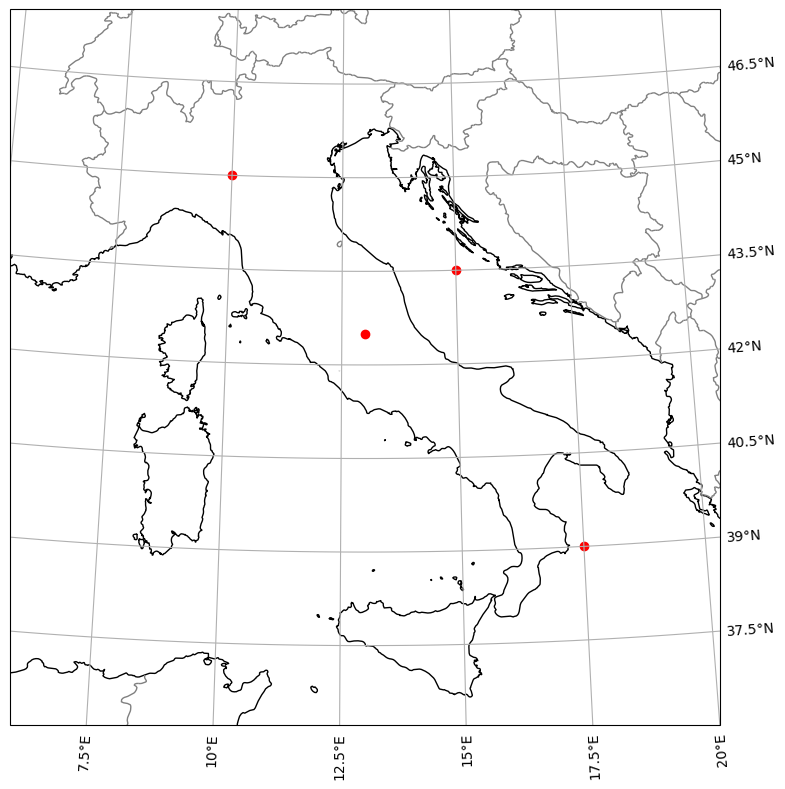

In [10]:
fig = make_geomap(projection,extent)
ax = fig.gca()
ax.scatter(*lles[:2], color="red", transform=cartopy.crs.PlateCarree());

## Seislab

```{div} full-width
To speed up the data visualization on geographic maps, the local module `seislab` has the function `setup_map` that makes most of the initial setting
```

In [11]:
from seislab import setup_map
help(setup_map)

ModuleNotFoundError: No module named 'seislab'

```{div} full-width
Here a few examples of its usage
```

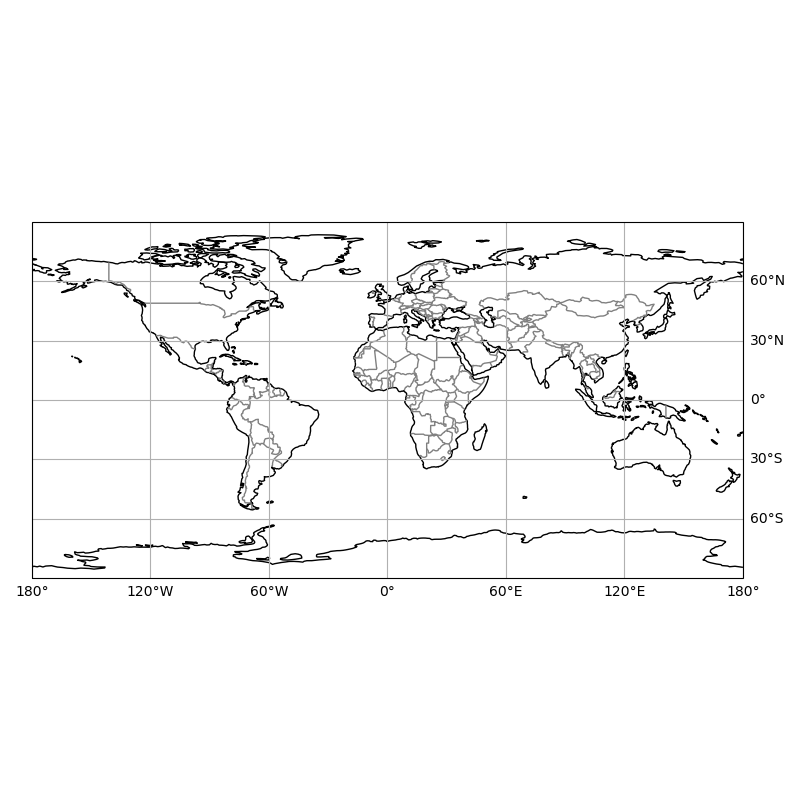

In [17]:
fig = setup_map()

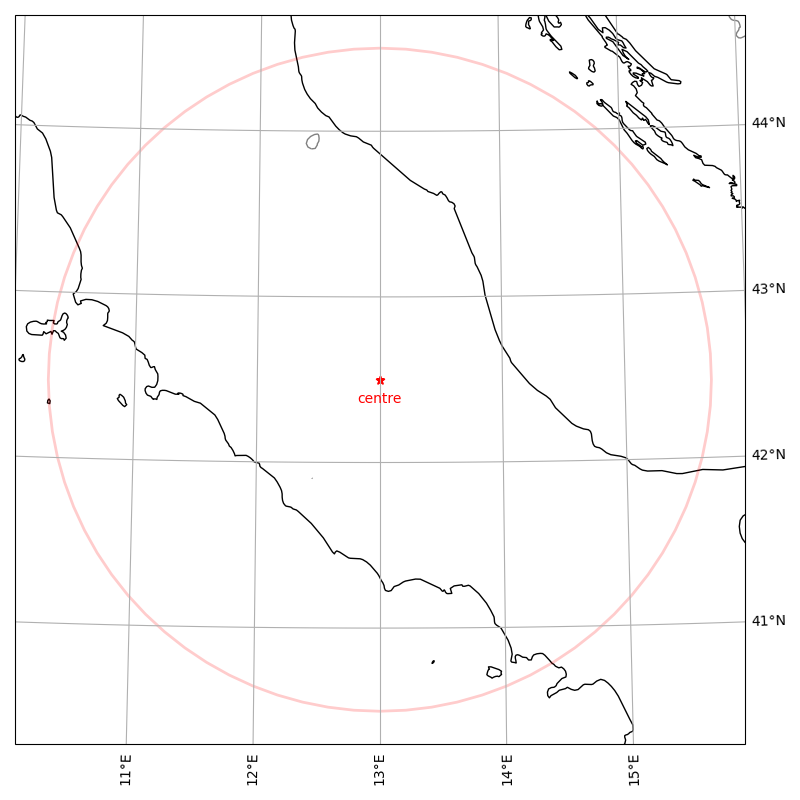

In [12]:
circle = dict(maxradius=2, longitude=13, latitude=42.5)
fig = setup_map(circle=circle, color="red", label="centre")

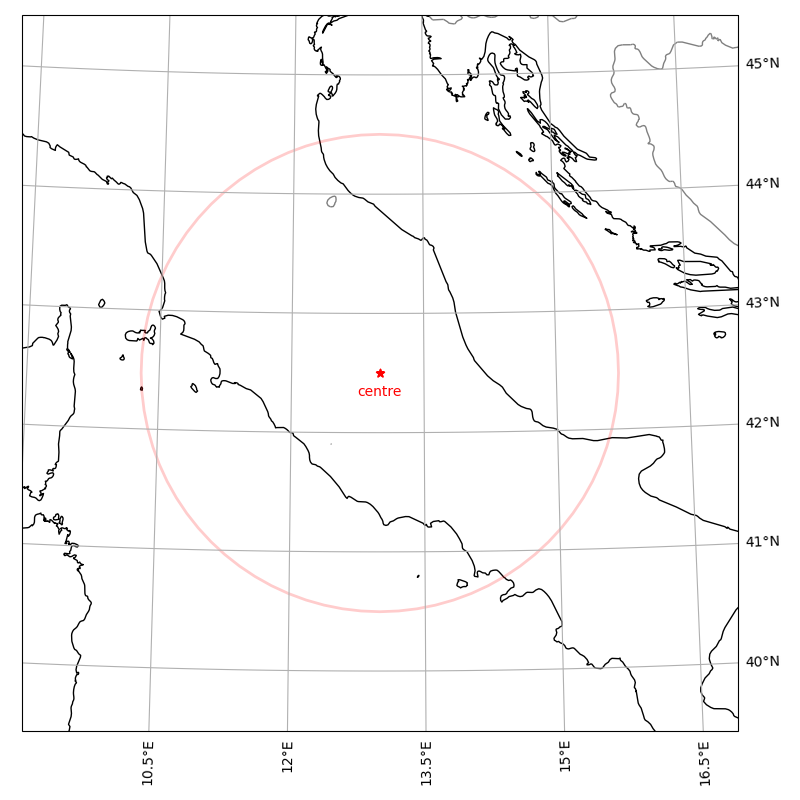

In [20]:
circle = dict(maxradius=2, longitude=13, latitude=42.5)
fig = setup_map(circle=circle, color="red", label="centre", scale=1.5)

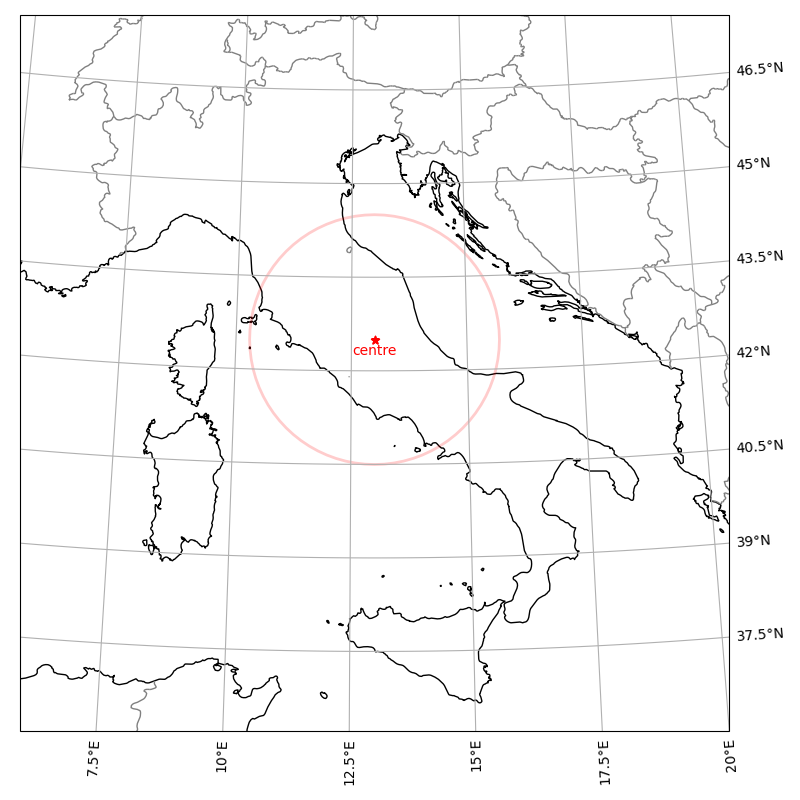

In [21]:
fig = setup_map(extent=extent, circle=circle, color="red", label="centre")

<p style="page-break-after:always;"></p>